In [ ]:
import scipy as sp
import numpy as np
import pandas as pd
import pandas_profiling as pp
from collections import Counter
#from imblearn.datasets import fetch_datasets
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from matplotlib import pyplot as plt



#loading csv into dataframe

url = 'https://raw.githubusercontent.com/shantanudeshpande94/bankruptcy-prediction/master/1year.csv'
df1 = pd.read_csv(url)

# DATA CLEANING

In [2]:
#to replace '?' with NA values

df1.replace({'?': None},inplace =True)

#to check null values in a column

df1.isna().sum()

#converting from object to float64
# df1 = df1.convert_objects(convert_numeric=True)

df1['Attr1'] = pd.to_numeric(df1['Attr1'])
df1['Attr2'] = pd.to_numeric(df1['Attr2'])
df1['Attr3'] = pd.to_numeric(df1['Attr3'])
df1['Attr4'] = pd.to_numeric(df1['Attr4'])
df1['Attr5'] = pd.to_numeric(df1['Attr5'])
df1['Attr6'] = pd.to_numeric(df1['Attr6'])
df1['Attr7'] = pd.to_numeric(df1['Attr7'])
df1['Attr8'] = pd.to_numeric(df1['Attr8'])
df1['Attr9'] = pd.to_numeric(df1['Attr9'])
df1['Attr10'] = pd.to_numeric(df1['Attr10'])
df1['Attr11'] = pd.to_numeric(df1['Attr11'])
df1['Attr12'] = pd.to_numeric(df1['Attr12'])
df1['Attr13'] = pd.to_numeric(df1['Attr13'])
df1['Attr14'] = pd.to_numeric(df1['Attr14'])
df1['Attr15'] = pd.to_numeric(df1['Attr15'])
df1['Attr16'] = pd.to_numeric(df1['Attr16'])
df1['Attr17'] = pd.to_numeric(df1['Attr17'])
df1['Attr18'] = pd.to_numeric(df1['Attr18'])
df1['Attr19'] = pd.to_numeric(df1['Attr19'])
df1['Attr20'] = pd.to_numeric(df1['Attr20'])
df1['Attr21'] = pd.to_numeric(df1['Attr21'])
df1['Attr22'] = pd.to_numeric(df1['Attr22'])
df1['Attr23'] = pd.to_numeric(df1['Attr23'])
df1['Attr24'] = pd.to_numeric(df1['Attr24'])
df1['Attr25'] = pd.to_numeric(df1['Attr25'])
df1['Attr26'] = pd.to_numeric(df1['Attr26'])
df1['Attr27'] = pd.to_numeric(df1['Attr27'])
df1['Attr28'] = pd.to_numeric(df1['Attr28'])
df1['Attr29'] = pd.to_numeric(df1['Attr29'])
df1['Attr30'] = pd.to_numeric(df1['Attr30'])
df1['Attr31'] = pd.to_numeric(df1['Attr31'])
df1['Attr32'] = pd.to_numeric(df1['Attr32'])
df1['Attr33'] = pd.to_numeric(df1['Attr33'])
df1['Attr34'] = pd.to_numeric(df1['Attr34'])
df1['Attr35'] = pd.to_numeric(df1['Attr35'])
df1['Attr36'] = pd.to_numeric(df1['Attr36'])
df1['Attr37'] = pd.to_numeric(df1['Attr37'])
df1['Attr38'] = pd.to_numeric(df1['Attr38'])
df1['Attr39'] = pd.to_numeric(df1['Attr39'])
df1['Attr40'] = pd.to_numeric(df1['Attr40'])
df1['Attr41'] = pd.to_numeric(df1['Attr41'])
df1['Attr42'] = pd.to_numeric(df1['Attr42'])
df1['Attr43'] = pd.to_numeric(df1['Attr43'])
df1['Attr44'] = pd.to_numeric(df1['Attr44'])
df1['Attr45'] = pd.to_numeric(df1['Attr45'])
df1['Attr46'] = pd.to_numeric(df1['Attr46'])
df1['Attr47'] = pd.to_numeric(df1['Attr47'])
df1['Attr48'] = pd.to_numeric(df1['Attr48'])
df1['Attr49'] = pd.to_numeric(df1['Attr49'])
df1['Attr50'] = pd.to_numeric(df1['Attr50'])
df1['Attr51'] = pd.to_numeric(df1['Attr51'])
df1['Attr52'] = pd.to_numeric(df1['Attr52'])
df1['Attr53'] = pd.to_numeric(df1['Attr53'])
df1['Attr54'] = pd.to_numeric(df1['Attr54'])
df1['Attr55'] = pd.to_numeric(df1['Attr55'])
df1['Attr56'] = pd.to_numeric(df1['Attr56'])
df1['Attr57'] = pd.to_numeric(df1['Attr57'])
df1['Attr58'] = pd.to_numeric(df1['Attr58'])
df1['Attr59'] = pd.to_numeric(df1['Attr59'])
df1['Attr60'] = pd.to_numeric(df1['Attr60'])
df1['Attr61'] = pd.to_numeric(df1['Attr61'])
df1['Attr62'] = pd.to_numeric(df1['Attr62'])
df1['Attr63'] = pd.to_numeric(df1['Attr63'])
df1['Attr64'] = pd.to_numeric(df1['Attr64'])

df1.dtypes

df1.mean()


Attr1        0.034660
Attr2        0.560215
Attr3        0.119969
Attr4        2.629143
Attr5     -263.167247
             ...     
Attr61      15.642228
Attr62    4763.201955
Attr63       8.126852
Attr64     208.731950
class        0.038566
Length: 65, dtype: float64

In [3]:
# dropping duplicate values 

df1.drop_duplicates(keep=False,inplace=True) 

In [4]:
#delete because of large number of missing values

del df1['Attr21']
del df1['Attr37']

#delete because of high correlation

df1 = df1.drop(['Attr14','Attr17','Attr18','Attr20','Attr22','Attr23','Attr24','Attr26',
        'Attr30','Attr31','Attr34','Attr38','Attr39','Attr40','Attr42','Attr43','Attr44','Attr46','Attr48',
        'Attr51','Attr52','Attr54','Attr56','Attr58','Attr61','Attr62','Attr63','Attr64','Attr7','Attr8','Attr9'], axis = 1)

In [5]:
#imputing missing values by mean

df1.fillna(df1.mean(), inplace=True)

In [6]:
#number of missing values

df1.isna().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
Attr6     0
Attr10    0
Attr11    0
Attr12    0
Attr13    0
Attr15    0
Attr16    0
Attr19    0
Attr25    0
Attr27    0
Attr28    0
Attr29    0
Attr32    0
Attr33    0
Attr35    0
Attr36    0
Attr41    0
Attr45    0
Attr47    0
Attr49    0
Attr50    0
Attr53    0
Attr55    0
Attr57    0
Attr59    0
Attr60    0
class     0
dtype: int64

# FEATURE SELECTION USING BORUTA

In [7]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.impute import SimpleImputer

In [8]:

# Create a list of feature names
feat_labels = ['Attr1','Attr2','Attr3','Attr4','Attr5','Attr6','Attr10',
              'Attr11','Attr12','Attr13','Attr15','Attr16','Attr19',
              'Attr25','Attr27','Attr28','Attr29',
              'Attr32','Attr33','Attr35','Attr36',
              'Attr41','Attr45','Attr47','Attr49','Attr50',
              'Attr53','Attr55','Attr57','Attr59','Attr60',
              ]


In [9]:
#Create X from the features
X = df1[feat_labels].values
#X = df1.iloc[:,:31]

# Create y from output
y = df1['class'].values.ravel()
#y = df1.iloc[:,31]

#setup the RandomForrestClassifier as the estimator to use for Boruta
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

#Setup Boruta
boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=4242, max_iter = 50, perc = 90)
boruta_feature_selector.fit(X, y)

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	26
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 50
Confirmed: 	26
Tentative: 	5
Rejected: 	0
Iteration: 	10 / 50
Confirmed: 	26
Tentative: 	4
Rejected: 	1
Iteration: 	11 / 50
Confirmed: 	26
Tentative: 	4
Rejected: 	1
Iteration: 	12 / 50
Confirmed: 	26
Tentative: 	4
Rejected: 	1
Iteration: 	13 / 50
Confirmed: 	26
Tentative: 	4
Rejected: 	1
Iteration: 	14 / 50
Confirmed: 	26
Tentative: 	4
Rejected: 	1
Iteration: 	15 / 50
Confirmed: 	26
Tentative: 	4
Rejected: 	1
Iteration: 	16 / 50
Confirmed: 	26
Tentative: 	4
Rejected: 	1
Iteration: 	17 / 

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=152, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x1F61A790A98,
                                          verbose=0, warm_start=False),
         max_iter=50, n_es

In [10]:
#Boruta has run now we can transform our dataset

X_filtered = boruta_feature_selector.transform(X)
X_filtered.shape

(6863, 26)

In [11]:
#converting X_filtered to Dataframe

X_filtered = pd.DataFrame(data=X_filtered,
          index=np.arange(1, 6864),
          columns=np.arange(1, 27))

#y = pd.DataFrame(data=y,
 #         index=np.arange(1, 6864),
  #        columns=np.arange(1, 2))

In [12]:
#create a list of the feature names if we would like to use them at a later stage.

final_features = list()
indexes = np.where(boruta_feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(feat_labels[x])
print(final_features)

['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr15', 'Attr16', 'Attr19', 'Attr25', 'Attr27', 'Attr28', 'Attr29', 'Attr35', 'Attr41', 'Attr45', 'Attr47', 'Attr49', 'Attr50', 'Attr53', 'Attr55', 'Attr57']


# SMOTE+ENN TECHNIQUE

In [13]:
# Split the data into 20% test and 80% training
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=0)

0    6592
1     271
Name: class, dtype: int64

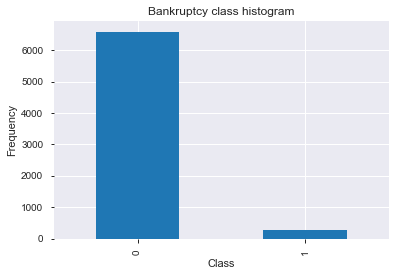

In [14]:
import matplotlib.pyplot as plt

pd.value_counts(df1['class']).plot.bar()
plt.title('Bankruptcy class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df1['class'].value_counts()

In [15]:
#SMOTE+ENN Technique

from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=0)

columns = X_train.columns

X_res, y_res = sme.fit_resample(X_train, y_train)

#X_res = pd.DataFrame(data=X_res,columns=columns)
#y_res = pd.DataFrame(data=y_res,columns=['y'])


print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 5264, 1: 226})
Resampled dataset shape Counter({1: 4271, 0: 3735})


# BUILDING RANDOM FOREST MODEL

In [16]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
from sklearn.metrics import accuracy_score

# Apply The Full Featured Classifier To The Limited feature Test Data
y_important_pred = clf_important.predict(X_test)

# View The Accuracy Of Our Limited Feature Model
accuracy_score(y_test, y_important_pred)

0.9373634377276038

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_important_pred)

array([[1264,   64],
       [  22,   23]], dtype=int64)

In [24]:
from pycm import *

cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_important_pred) # Create CM From Data
cm.table
print(cm)

Predict    0          1          
Actual
0          1264       64         

1          22         23         





Overall Statistics : 

95% CI                                                            (0.92455,0.95018)
ACC Macro                                                         0.93736
AUNP                                                              0.73146
AUNU                                                              0.73146
Bennett S                                                         0.87473
CBA                                                               0.60809
CSI                                                               0.35509
Chi-Squared                                                       157.15553
Chi-Squared DF                                                    1
Conditional Entropy                                               0.3023
Cramer V                                                          0.33832
Cross Entropy                              

In [20]:
from sklearn.metrics import confusion_matrix

tp, fp, fn, tn = confusion_matrix(y_test, y_important_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  23
False Positives:  64
False Negatives:  22
True Positives:  1264


In [21]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

#F1 Score
f1 = (2*(Precision*Recall)/(Precision + Recall))
print("F1 Score {:0.2f}".format(f1))

Precision 0.95
Recall 0.98
F1 Score 0.97


# BUILDING DECISION TREE MODEL

In [26]:
#!pip install pydot

You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [21]:
'''
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
'''

In [47]:
'''
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_res, y_res)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

'''

In [51]:
'''
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
'''

Accuracy: 0.9067734887108522


In [54]:
'''
#Confusion Matrix summary

from pycm import *

cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) # Create CM From Data
print(cm)
'''

Predict    0          1          
Actual
0          1219       109        

1          19         26         





Overall Statistics : 

95% CI                                                            (0.89139,0.92215)
ACC Macro                                                         0.90677
AUNP                                                              0.74785
AUNU                                                              0.74785
Bennett S                                                         0.81355
CBA                                                               0.55526
CSI                                                               0.33647
Chi-Squared                                                       120.6323
Chi-Squared DF                                                    1
Conditional Entropy                                               0.42824
Cramer V                                                          0.29641
Cross Entropy                              

In [57]:
'''

#Calculating TP, FP, FN, TN

from sklearn.metrics import confusion_matrix

tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

'''

True Negatives:  26
False Positives:  109
False Negatives:  19
True Positives:  1219


In [59]:
'''

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

#F1 Score
f1 = (2*(Precision*Recall)/(Precision + Recall))
print("F1 Score {:0.2f}".format(f1))

'''

Precision 0.92
Recall 0.98
F1 Score 0.95


You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Running setup.py install for pydotplus: started
    Running setup.py install for pydotplus: finished with status 'done'


You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


InvocationException: GraphViz's executables not found

NameError: name 'X_res' is not defined

array([[ 1.59300000e-01,  4.00410000e-01,  2.61130000e-01, ...,
         1.48060000e+00,  4.12340000e+03,  2.95950000e-01],
       [ 2.01730000e-01,  4.92350000e-02,  3.00280000e-01, ...,
         1.43280000e+00,  1.82710000e+05,  2.16440000e-01],
       [ 8.92100000e-02,  4.08070000e-01,  8.68440000e-02, ...,
         1.09820000e+00,  5.68660000e+03,  1.50710000e-01],
       ...,
       [ 9.18951889e-02,  2.08163499e-01,  4.12974347e-01, ...,
         2.02742329e+00,  3.65289975e+04,  1.16490596e-01],
       [-1.43202771e-01,  7.62123523e-01, -5.63932000e-02, ...,
         6.03159091e-01, -1.56597550e+03, -6.12026998e-01],
       [ 2.26502362e-01,  5.44586797e-01, -8.56069634e-02, ...,
         7.73152459e-01, -1.63964350e+03,  5.22451954e-01]])

# BUILDING KNN MODEL

In [17]:
import numpy as np
from sklearn import neighbors
import pandas as pd

In [18]:
clf = neighbors.KNeighborsClassifier()

In [19]:
clf.fit(X_res, y_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.7691187181354697


In [34]:

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

#F1 Score
f1 = (2*(Precision*Recall)/(Precision + Recall))
print("F1 Score {:0.2f}".format(f1))

NameError: name 'tp' is not defined

#    # BUILDING MODEL USING BASELINE NEURAL NETWORK

In [23]:
!pip install keras

In [25]:
!pip install tensorflow

    Running setup.py install for termcolor: started
    Running setup.py install for termcolor: finished with status 'done'
    Running setup.py install for absl-py: started
    Running setup.py install for absl-py: finished with status 'done'
    Running setup.py install for opt-einsum: started
    Running setup.py install for opt-einsum: finished with status 'done'
    Running setup.py install for gast: started
    Running setup.py install for gast: finished with status 'done'


ERROR: tensorboard 2.0.1 has requirement setuptools>=41.0.0, but you'll have setuptools 40.6.2 which is incompatible.


In [55]:
from sklearn.preprocessing import StandardScaler 

In [56]:
# Define the scaler 
scaler = StandardScaler().fit(X_res)

# Scale the train set
X_nn_res = scaler.transform(X_res)

# Scale the test set
X_nn_test = scaler.transform(X_test)

In [60]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(26,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [61]:
# Model output shape
model.output_shape

# Model summary
model.summary

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

[array([[-0.08973274, -0.01515645, -0.07958195, -0.11998275, -0.33572605,
         -0.03796527,  0.38072094,  0.306105  , -0.03693557,  0.17863134,
          0.37695298, -0.2600903 ],
        [ 0.17869118,  0.15177926, -0.08697787,  0.29204586, -0.24601898,
          0.15244064, -0.12780043, -0.14328715, -0.01484686,  0.14463529,
         -0.0214029 , -0.05454707],
        [ 0.04781073,  0.15747043, -0.33703503, -0.09809032,  0.31258205,
         -0.00111544, -0.2591575 , -0.05609158, -0.20126534,  0.21378061,
          0.21019825, -0.23269787],
        [-0.02454963, -0.09044981, -0.36949396,  0.1504983 , -0.01109096,
          0.01365343, -0.3963243 ,  0.20717159,  0.07827911,  0.26770732,
         -0.24627297,  0.27957204],
        [ 0.01545563, -0.08697832, -0.15749775, -0.08023345,  0.3907363 ,
         -0.06045473, -0.09825668, -0.30674106, -0.3328552 , -0.24149695,
          0.1240218 , -0.10105941],
        [ 0.34488443,  0.07198009,  0.35916194,  0.04757503, -0.29744452,
      

In [63]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_nn_res, y_res,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
8006/8006 [==============================] - 14s 2ms/step - loss: 0.5825 - accuracy: 0.7035
Epoch 2/20
8006/8006 [==============================] - 14s 2ms/step - loss: 0.3789 - accuracy: 0.8500
Epoch 3/20
8006/8006 [==============================] - 13s 2ms/step - loss: 0.2774 - accuracy: 0.8925
Epoch 4/20
8006/8006 [==============================] - 13s 2ms/step - loss: 0.2406 - accuracy: 0.9076
Epoch 5/20
8006/8006 [==============================] - 13s 2ms/step - loss: 0.2203 - accuracy: 0.9126
Epoch 6/20
8006/8006 [==============================] - 14s 2ms/step - loss: 0.2087 - accuracy: 0.9147
Epoch 7/20
8006/8006 [==============================] - 14s 2ms/step - loss: 0.1956 - accuracy: 0.9207
Epoch 8/20
8006/8006 [==============================] - 14s 2ms/step - loss: 0.1896 - accuracy: 0.9232
Epoch 9/20
8006/8006 [==============================] - 14s 2ms/step - loss: 0.1868 - accuracy: 0.9257
Epoch 10/20
8006/8006 [==============================] - 14s 2ms/step - l

In [64]:
y_nn_pred = model.predict(X_test)

In [65]:
score = model.evaluate(X_nn_test, y_test,verbose=1)

print(score)

1373/1373 [==============================] - 0s 44us/step
[0.3472626213600231, 0.8623452186584473]


In [66]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_nn_pred)

array([[1257,   71],
       [  41,    4]], dtype=int64)

In [68]:
# Precision 
precision_score(y_test, y_nn_pred)

0.05333333333333334

In [69]:
# Recall
recall_score(y_test, y_nn_pred)

0.08888888888888889

In [70]:
# F1 score
f1_score(y_test,y_nn_pred)

0.06666666666666668

In [71]:
#Calculating TP, FP, FN, TN

from sklearn.metrics import confusion_matrix

tp, fp, fn, tn = confusion_matrix(y_test, y_nn_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)


True Negatives:  4
False Positives:  71
False Negatives:  41
True Positives:  1257


In [72]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

#F1 Score
f1 = (2*(Precision*Recall)/(Precision + Recall))
print("F1 Score {:0.2f}".format(f1))

Precision 0.95
Recall 0.97
F1 Score 0.96
